<a href="https://colab.research.google.com/github/Kbackma1/BIO494-NeuroData/blob/master/Copy_of_spinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is "Spinal Reflex"

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

!['reflex-arc'](https://backyardbrains.com/experiments/img/Knee_Reflex_web.jpg)

In [0]:
from IPython.display import YouTubeVideo

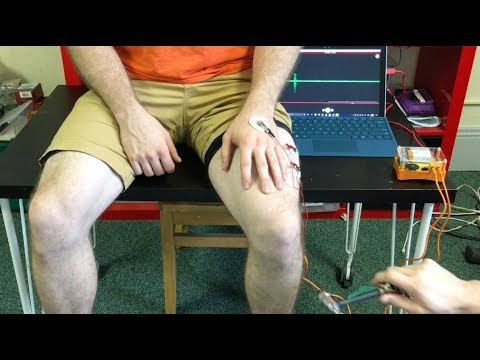

In [0]:
YouTubeVideo('heoWuQzn8Dc')

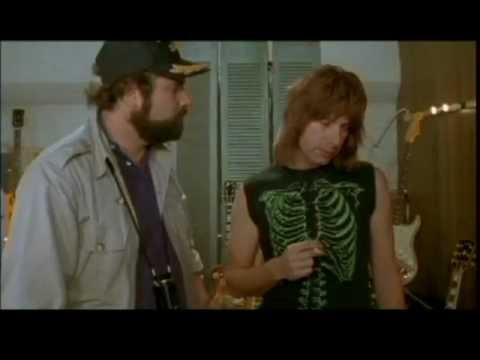

In [0]:
YouTubeVideo('KOO5S4vxi0o')

![bolt-false-start](https://static01.nyt.com/newsgraphics/2016/07/14/reaction-time/f336b384b664a85ec7af38142b3ce773d84cae6f/bolt-false-start.jpg)

##### ["On the apparent decrease in Olympic sprinter reaction times"](https://journals.plos.org/plosone/article/figure/image?id=10.1371/journal.pone.0198633.g001&size=inline)
![plos-figure](https://journals.plos.org/plosone/article/figure/image?size=medium&id=10.1371/journal.pone.0198633.g001)

## Loading the original data

In [0]:
# Load the Data
df = pd.read_csv('https://raw.githubusercontent.com/rgerkin/neuro-data-analysis-course/master/data/spinal/2004-2016-Short-Races2.csv')
df.head()

,Unnamed: 0,POS,BIB,ATHLETE,COUNTRY,MARK,RxnTime,Race,Round,Gender,Year
0,0,1.0,NaN,Usain BOLT,JAMJAM,10.20 Q,0.186,100 m,Heats,M,2008
1,1,2.0,NaN,Daniel BAILEY,ANTANT,10.24 Q,0.198,100 m,Heats,M,2008
2,2,3.0,NaN,Vicente DE LIMA,BRABRA,10.26 Q,0.168,100 m,Heats,M,2008
3,3,4.0,NaN,Henry VIZCAÍNO,CUBCUB,10.28 q,0.157,100 m,Heats,M,2008
4,4,5.0,NaN,Fabio CERUTTI,ITAITA,10.49,0.136,100 m,Heats,M,2008


In [0]:
# The original data had some unusual characters in it so I re-encoded it.  
# This is beyond the scope of today's class, but the code is shown here for completeness
# The original file was obtained at https://deepblue.lib.umich.edu/data/concern/generic_works/cr56n184r
# I loaded it in with a re-encoding of the characters...

#df = pd.read_csv('neuro-data-analysis-course/data/spinal/2004-2016-Short-Races.csv', 
#                 encoding = "latin1")

# And then saved it as the file we ended up using for class.  

#df.to_csv('neuro-data-analysis-course/data/spinal/2004-2016-Short-Races2.csv')

## Initial exploration of the data

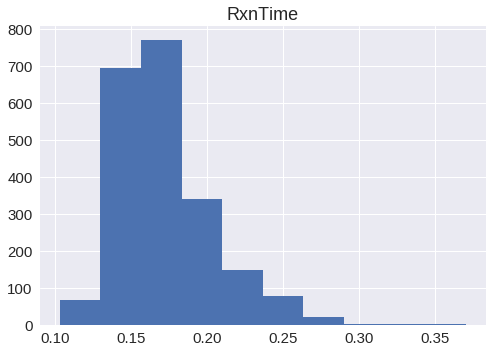

In [0]:
# Plot a histogram of reaction times
df.hist('RxnTime');

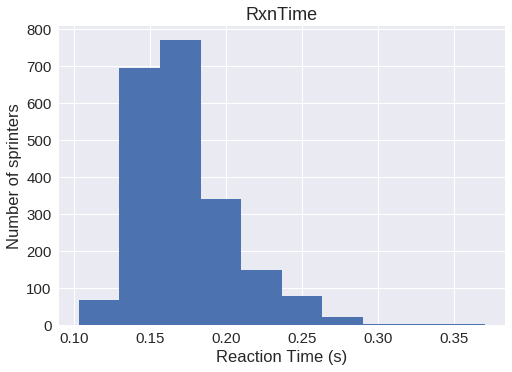

In [0]:
# Plot a histogram of reaction times but with axis labels
ax = df.hist('RxnTime')[0,0];
ax.set_xlabel('Reaction Time (s)')
ax.set_ylabel('Number of sprinters');

In [0]:
# Compute the means for each gender and year
means = df.groupby(['Gender','Year']).mean()
means

Unnamed: 0       POS          BIB   RxnTime
Gender Year                                              
F      1996  2310.180000  4.316327          NaN       NaN
       2000  2008.368889  4.417431          NaN  0.203074
       2004  1399.696133  4.235294          NaN  0.187012
       2008   250.000000  4.524038          NaN  0.183009
       2012   604.261084  4.356021  2177.142857  0.167126
       2016   961.500000  4.396907   853.065000  0.152101
M      1996  2326.500000  4.712575          NaN       NaN
       2000  1878.921642  4.564202          NaN  0.190659
       2004  1529.087302  4.361345          NaN  0.163224
       2008   207.777778  4.323404          NaN  0.162435
       2012   712.738916  4.274194  2155.221675  0.162385
       2016  1160.000000  4.363636  2569.269036  0.145408

## Filtering the data

In [0]:
# Determine which rows contain female athletes
female = df['Gender']=='F'
female.head()

0    False
1    False
2    False
3    False
4    False
Name: Gender, dtype: bool

In [0]:
# Determine which rows contain male athletes
male = df['Gender']=='M'
male.head()

0    True
1    True
2    True
3    True
4    True
Name: Gender, dtype: bool

In [0]:
# Select only those rows with female athletes
df[female].head()

,Unnamed: 0,POS,BIB,ATHLETE,COUNTRY,MARK,RxnTime,Race,Round,Gender,Year
144,144,1.0,NaN,Torri EDWARDS,USAUSA,11.26 Q,0.169,100 m,Heats,F,2008
145,145,2.0,NaN,Jeanette KWAKYE,GBRGBR,11.30 Q,0.142,100 m,Heats,F,2008
146,146,3.0,NaN,Myriam Léonie MANI,CMRCMR,11.64 Q,0.151,100 m,Heats,F,2008
147,147,4.0,NaN,Inna EFTIMOVA,BULBUL,11.67,0.189,100 m,Heats,F,2008
148,148,5.0,NaN,Jing WANG,CHNCHN,11.87,0.188,100 m,Heats,F,2008


In [0]:
# Select only those rows with male athletes
df[male].head()

,Unnamed: 0,POS,BIB,ATHLETE,COUNTRY,MARK,RxnTime,Race,Round,Gender,Year
0,0,1.0,NaN,Usain BOLT,JAMJAM,10.20 Q,0.186,100 m,Heats,M,2008
1,1,2.0,NaN,Daniel BAILEY,ANTANT,10.24 Q,0.198,100 m,Heats,M,2008
2,2,3.0,NaN,Vicente DE LIMA,BRABRA,10.26 Q,0.168,100 m,Heats,M,2008
3,3,4.0,NaN,Henry VIZCAÍNO,CUBCUB,10.28 q,0.157,100 m,Heats,M,2008
4,4,5.0,NaN,Fabio CERUTTI,ITAITA,10.49,0.136,100 m,Heats,M,2008


## Constructing the desired graph

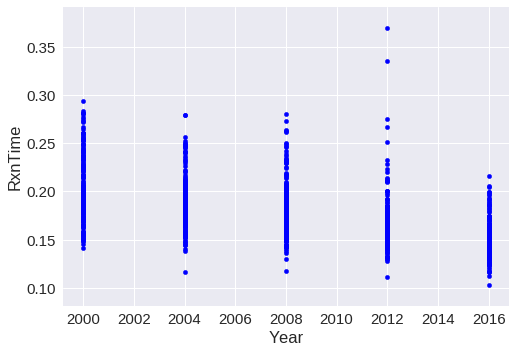

In [0]:
# Plot the female athletes' reaction times
df[female].plot.scatter(x='Year', y='RxnTime', color='b');

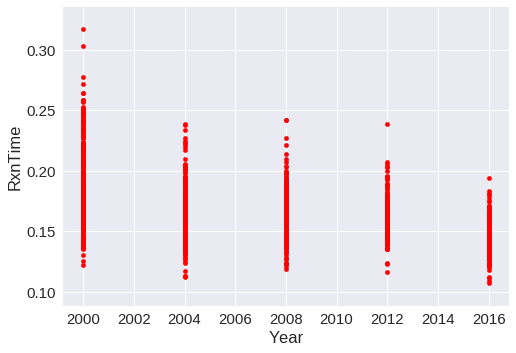

In [0]:
# Plot the male athletes' reaction times
df[male].plot.scatter(x='Year', y='RxnTime', color='r');

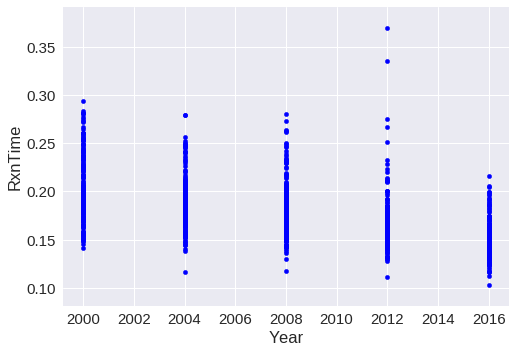

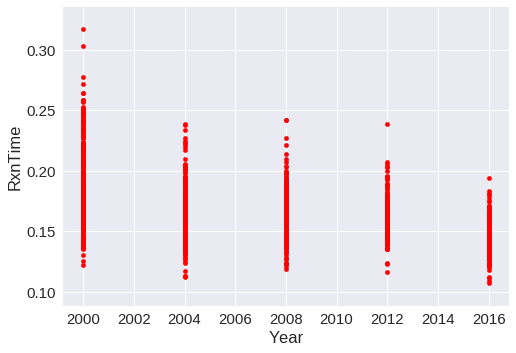

In [0]:
# Plot both sets of athletes' reaction times on separate graphs
df[female].plot.scatter(x='Year', y='RxnTime', color='b');
df[male].plot.scatter(x='Year', y='RxnTime', color='r');

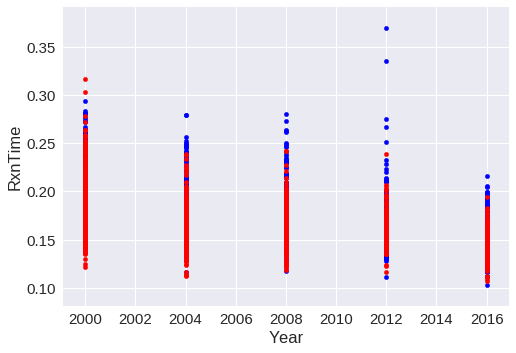

In [0]:
# Plot both sets of athletes' reaction times on the same graph
ax = df[female].plot.scatter(x='Year', y='RxnTime', color='b');
df[male].plot.scatter(x='Year', y='RxnTime', color='r', ax=ax);

## Introducing *seaborn*: a faster, more intuitive way to get nice-looking graphs

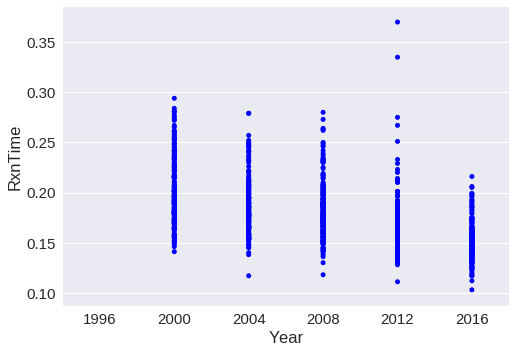

In [0]:
# A strip plot (jittered scatter plot) of the female athletes' reaction times
sns.stripplot(x='Year', y='RxnTime', color='b', data=df[female]);

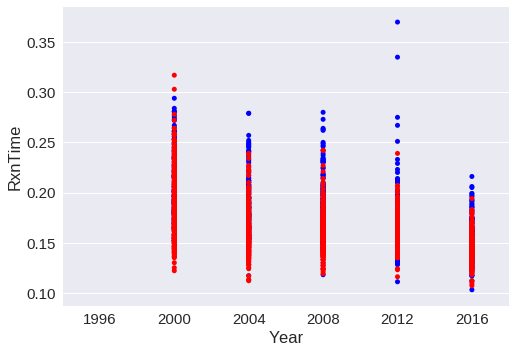

In [0]:
# A strip plot (jittered scatter plot) of the both sets of athletes' reaction times
sns.stripplot(x='Year', y='RxnTime', color='b', data=df[female])
sns.stripplot(x='Year', y='RxnTime', color='r', data=df[male]);

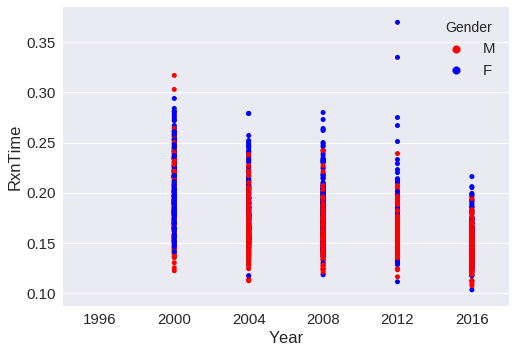

In [0]:
# A simpler way to do the same thing using built-in keyword arguments  
sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b']);

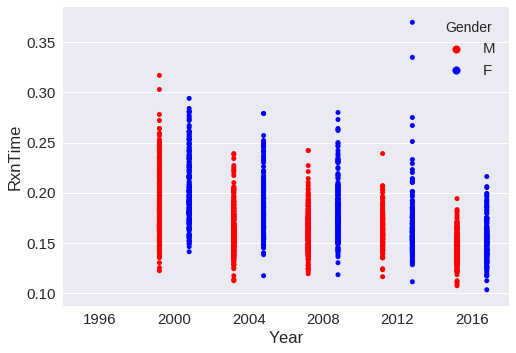

In [0]:
# The strip plot with the data offset for each gender
sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b'], split=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


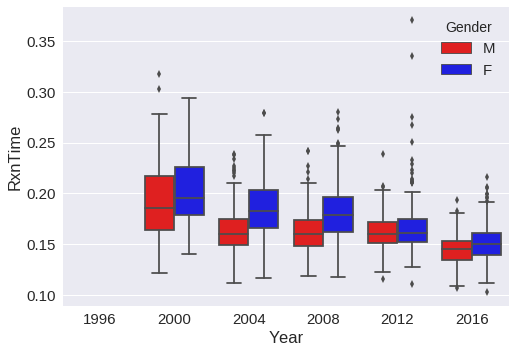

In [0]:
# A box plot for the same data
sns.boxplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b']);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


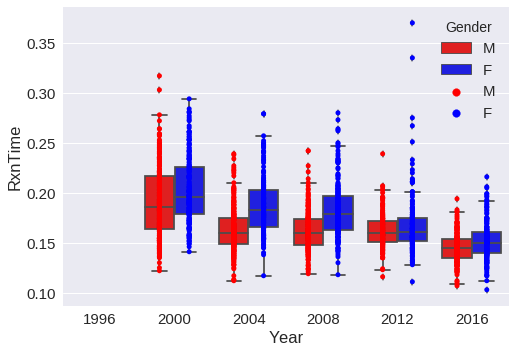

In [0]:
# The strip plot and box plot together
sns.boxplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b']);
sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b'], split=True);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


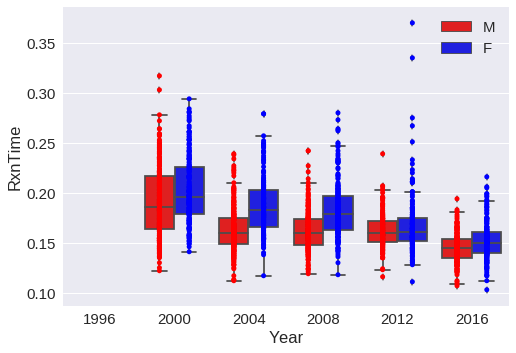

In [0]:
# Remove the duplicate legend entries
sns.boxplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b']);
ax = sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r', 'b'], split=True);
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:2], labels[:2])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


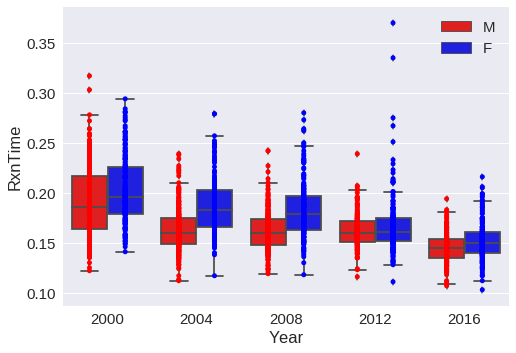

In [0]:
# Zoom in on the years that contain data
sns.boxplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r','b']);
ax = sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r','b'], split=True);
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:2], labels[:2])
ax.set_xlim(0.5,5.5);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


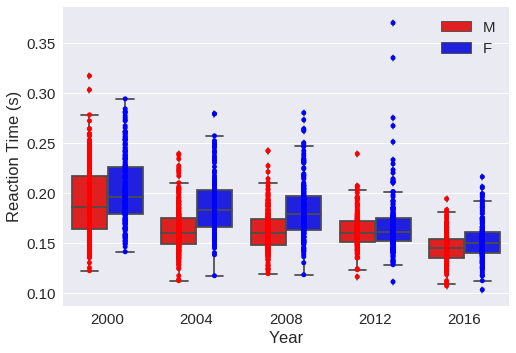

In [0]:
# Set a nicer y-axis label
sns.boxplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r','b']);
ax = sns.stripplot(x='Year', y='RxnTime', data=df, hue='Gender', palette=['r','b'], split=True);
handles, labels = ax.get_legend_handles_labels()
l = ax.legend(handles[:2], labels[:2])
ax.set_xlim(0.5,5.5);
ax.set_ylabel('Reaction Time (s)');

![plos-figure](https://journals.plos.org/plosone/article/figure/image?size=medium&id=10.1371/journal.pone.0198633.g001)